## Data cleaning and manipulation on a small dataset

SonarQube is a tool that checks the quality of code developed in lower environment and reports code smells, vulnerabilities or any critical bugs/ security threats that needs to be fixed before deployment to production.
This dataset reports few bugs and code smells on newly developed code of a particular application but the data is cluttered and indecipherable. So I performed data cleaning and transformation using python pandas library and did some further analysis

* SonarQube code quality report.xlsx contains 'file path', 'description of issue' and 'issue category' clubbed together into a single column along with some noises.

#### Objective:
* Remove noise, separate 'file path', 'Description of issue' and 'issue category' values into individual columns and perform some analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sq = pd.read_excel('SonarQube code quality report.xlsx')
sq

,col
0,app/Domain/ApiService.php
1,2 duplicated blocks of code must be removed.
2,Code Smell
3,Remove this commented out code.
4,Code Smell
...,...
342,Code Smell
343,config/logging.php
344,Define a constant instead of duplicating this ...
345,Code Smell


In [3]:
# Most of the file path starts with app/ or config/ so separate them out into a new column
# Only three categories are identified in this dataset, separate them out into another column

category = 'Code Smell|Bug|Vulnerability'
sq = (sq.assign(
file_path = sq.loc[sq['col'].str.contains('app/|config/', na=False), ['col']],
category = sq.loc[sq['col'].str.contains(category, na=False), ['col']]    
))
sq

,col,file_path,category
0,app/Domain/ApiService.php,app/Domain/ApiService.php,NaN
1,2 duplicated blocks of code must be removed.,NaN,NaN
2,Code Smell,NaN,Code Smell
3,Remove this commented out code.,NaN,NaN
4,Code Smell,NaN,Code Smell
...,...,...,...
342,Code Smell,NaN,Code Smell
343,config/logging.php,config/logging.php,NaN
344,Define a constant instead of duplicating this ...,NaN,NaN
345,Code Smell,NaN,Code Smell


In [4]:
sq['category'].unique()

array([nan, 'Code Smell', 'Bug', 'Vulnerability'], dtype=object)

In [5]:
# currently issue category is one line below our description but we want them to be on the same line as of description
# using bfill() to backward fill the data across the column
sq['category'] = sq['category'].bfill()
sq

,col,file_path,category
0,app/Domain/ApiService.php,app/Domain/ApiService.php,Code Smell
1,2 duplicated blocks of code must be removed.,NaN,Code Smell
2,Code Smell,NaN,Code Smell
3,Remove this commented out code.,NaN,Code Smell
4,Code Smell,NaN,Code Smell
...,...,...,...
342,Code Smell,NaN,Code Smell
343,config/logging.php,config/logging.php,Code Smell
344,Define a constant instead of duplicating this ...,NaN,Code Smell
345,Code Smell,NaN,Code Smell


In [6]:
# similarly, file path is one line above the description so forward fill the path across the column
sq['file_path'] = sq['file_path'].ffill()
sq

,col,file_path,category
0,app/Domain/ApiService.php,app/Domain/ApiService.php,Code Smell
1,2 duplicated blocks of code must be removed.,app/Domain/ApiService.php,Code Smell
2,Code Smell,app/Domain/ApiService.php,Code Smell
3,Remove this commented out code.,app/Domain/ApiService.php,Code Smell
4,Code Smell,app/Domain/ApiService.php,Code Smell
...,...,...,...
342,Code Smell,app/Providers/RouteServiceProvider.php,Code Smell
343,config/logging.php,config/logging.php,Code Smell
344,Define a constant instead of duplicating this ...,config/logging.php,Code Smell
345,Code Smell,config/logging.php,Code Smell


In [7]:
# Now file_path and category are copied separately to new columns and are no longer needed in the 'col' column.
# let's drop the file_path and category 
sq.drop(sq.loc[sq['col'].str.contains('app/|config/', na=False)].index, axis=0, inplace=True)

In [8]:
sq

,col,file_path,category
1,2 duplicated blocks of code must be removed.,app/Domain/ApiService.php,Code Smell
2,Code Smell,app/Domain/ApiService.php,Code Smell
3,Remove this commented out code.,app/Domain/ApiService.php,Code Smell
4,Code Smell,app/Domain/ApiService.php,Code Smell
5,"Rename ""$endpoint"" which has the same name as ...",app/Domain/ApiService.php,Code Smell
...,...,...,...
341,Remove this commented out code.,app/Providers/RouteServiceProvider.php,Code Smell
342,Code Smell,app/Providers/RouteServiceProvider.php,Code Smell
344,Define a constant instead of duplicating this ...,config/logging.php,Code Smell
345,Code Smell,config/logging.php,Code Smell


In [9]:
sq.drop(sq.loc[sq['col'].str.contains(category, na=False)].index, axis=0, inplace=True)
sq

,col,file_path,category
1,2 duplicated blocks of code must be removed.,app/Domain/ApiService.php,Code Smell
3,Remove this commented out code.,app/Domain/ApiService.php,Code Smell
5,"Rename ""$endpoint"" which has the same name as ...",app/Domain/ApiService.php,Code Smell
7,1,app/Domain/ApiService.php,Code Smell
8,Remove this commented out code.,app/Domain/ApiService.php,Code Smell
...,...,...,...
337,"Add a ""case default"" clause to this ""switch"" s...",app/Providers/RouteServiceProvider.php,Code Smell
339,Remove this commented out code.,app/Providers/RouteServiceProvider.php,Code Smell
341,Remove this commented out code.,app/Providers/RouteServiceProvider.php,Code Smell
344,Define a constant instead of duplicating this ...,config/logging.php,Code Smell


In [10]:
sq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 1 to 346
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   col        171 non-null    object
 1   file_path  171 non-null    object
 2   category   170 non-null    object
dtypes: object(3)
memory usage: 5.3+ KB


In [11]:
# We have some numeric values in the 'col' column. Change the datatype to string
sq = sq.astype({'col':'string', 'file_path': 'string', 'category': 'string'})
sq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 1 to 346
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   col        171 non-null    string
 1   file_path  171 non-null    string
 2   category   170 non-null    string
dtypes: string(3)
memory usage: 5.3 KB


In [12]:
# create a new column to track if column has numeric value
sq['bool'] = sq['col'].str.isnumeric()
sq

,col,file_path,category,bool
1,2 duplicated blocks of code must be removed.,app/Domain/ApiService.php,Code Smell,False
3,Remove this commented out code.,app/Domain/ApiService.php,Code Smell,False
5,"Rename ""$endpoint"" which has the same name as ...",app/Domain/ApiService.php,Code Smell,False
7,1,app/Domain/ApiService.php,Code Smell,True
8,Remove this commented out code.,app/Domain/ApiService.php,Code Smell,False
...,...,...,...,...
337,"Add a ""case default"" clause to this ""switch"" s...",app/Providers/RouteServiceProvider.php,Code Smell,False
339,Remove this commented out code.,app/Providers/RouteServiceProvider.php,Code Smell,False
341,Remove this commented out code.,app/Providers/RouteServiceProvider.php,Code Smell,False
344,Define a constant instead of duplicating this ...,config/logging.php,Code Smell,False


In [13]:
# drop all the rows with bool = True
sq.drop(sq.loc[sq['bool']== True].index, axis=0, inplace=True)
sq

,col,file_path,category,bool
1,2 duplicated blocks of code must be removed.,app/Domain/ApiService.php,Code Smell,False
3,Remove this commented out code.,app/Domain/ApiService.php,Code Smell,False
5,"Rename ""$endpoint"" which has the same name as ...",app/Domain/ApiService.php,Code Smell,False
8,Remove this commented out code.,app/Domain/ApiService.php,Code Smell,False
10,"Rename ""$endpoint"" which has the same name as ...",app/Domain/ApiService.php,Code Smell,False
...,...,...,...,...
335,Remove this commented out code.,app/Providers/RouteServiceProvider.php,Code Smell,False
337,"Add a ""case default"" clause to this ""switch"" s...",app/Providers/RouteServiceProvider.php,Code Smell,False
339,Remove this commented out code.,app/Providers/RouteServiceProvider.php,Code Smell,False
341,Remove this commented out code.,app/Providers/RouteServiceProvider.php,Code Smell,False


In [14]:
# let's drop bool column since its no longer needed
sq.drop(['bool'], axis=1, inplace = True)
sq

,col,file_path,category
1,2 duplicated blocks of code must be removed.,app/Domain/ApiService.php,Code Smell
3,Remove this commented out code.,app/Domain/ApiService.php,Code Smell
5,"Rename ""$endpoint"" which has the same name as ...",app/Domain/ApiService.php,Code Smell
8,Remove this commented out code.,app/Domain/ApiService.php,Code Smell
10,"Rename ""$endpoint"" which has the same name as ...",app/Domain/ApiService.php,Code Smell
...,...,...,...
335,Remove this commented out code.,app/Providers/RouteServiceProvider.php,Code Smell
337,"Add a ""case default"" clause to this ""switch"" s...",app/Providers/RouteServiceProvider.php,Code Smell
339,Remove this commented out code.,app/Providers/RouteServiceProvider.php,Code Smell
341,Remove this commented out code.,app/Providers/RouteServiceProvider.php,Code Smell


In [15]:
# index are jumbled, let's reset index
sq =sq.reset_index(drop=True)

In [16]:
# rename col to description
sq.rename(columns={'col':'description'}, inplace=True)

In [17]:
sq

,description,file_path,category
0,2 duplicated blocks of code must be removed.,app/Domain/ApiService.php,Code Smell
1,Remove this commented out code.,app/Domain/ApiService.php,Code Smell
2,"Rename ""$endpoint"" which has the same name as ...",app/Domain/ApiService.php,Code Smell
3,Remove this commented out code.,app/Domain/ApiService.php,Code Smell
4,"Rename ""$endpoint"" which has the same name as ...",app/Domain/ApiService.php,Code Smell
...,...,...,...
131,Remove this commented out code.,app/Providers/RouteServiceProvider.php,Code Smell
132,"Add a ""case default"" clause to this ""switch"" s...",app/Providers/RouteServiceProvider.php,Code Smell
133,Remove this commented out code.,app/Providers/RouteServiceProvider.php,Code Smell
134,Remove this commented out code.,app/Providers/RouteServiceProvider.php,Code Smell


In [18]:
# output the data into excel file
sq.to_excel('SQ_data_transformation_python.xlsx', index=False)

In [19]:
count = sq['category'].value_counts()
df_count = pd.DataFrame(count).reset_index()
df_count.rename(columns={'index':'Category', 'category':'Count'}, inplace=True)

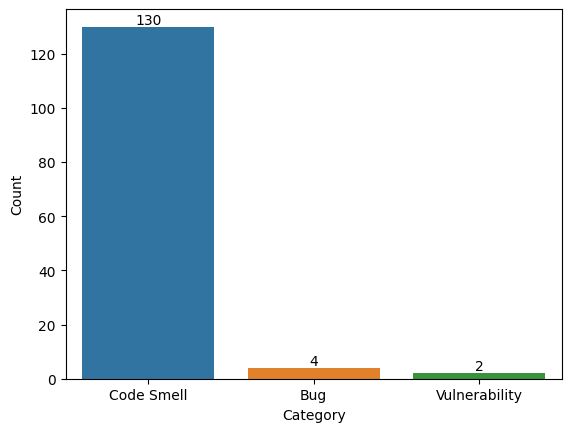

In [20]:
ax = sns.barplot(x = 'Category',
           y = 'Count',
           data = df_count,
           estimator='sum'
           )
ax.bar_label(ax.containers[0])
plt.show()

In [21]:
# Top 5 files reporting issues
top5_files = sq['file_path'].value_counts().sort_values(ascending=False).iloc[:5]
top5_files

app/Domain/Helpers.php                       15
app/Domain/CompanyService.php                15
app/Http/Controllers/CronController.php      10
app/Domain/ApiService.php                     8
app/Http/Controllers/SignupController.php     7
Name: file_path, dtype: Int64

In [22]:
top5_files = pd.DataFrame(top5_files).reset_index()

In [23]:
top5_files.rename(columns={'index':'file path', 'file_path': 'count'}, inplace = True)

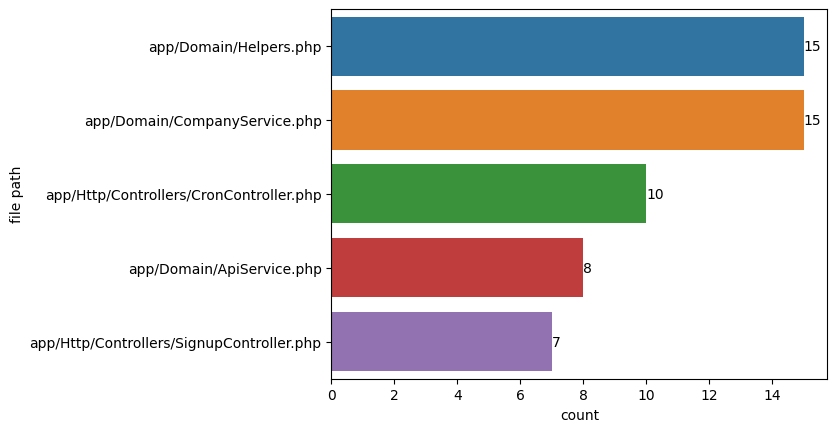

In [24]:
ax = sns.barplot(x='count',
           y='file path',
           data=top5_files)
ax.bar_label(ax.containers[0])
plt.show()

In [25]:
# top 5 most recurring issue
sq['description'].value_counts().iloc[:5]

Remove this commented out code.                      33
Add a "case default" clause to this "switch" s...    10
Replace this "switch" statement with "if" stat...     8
Remove the unused function parameter "$guard".        7
Immediately return this expression instead of ...     6
Name: description, dtype: Int64